# GRIP Nov 2020 @ The Sparks Foundation

# Data Science & Business Analytics Internship

# TASK 3 : Prediction Using Decision Tree Algorithm

## NAME : Brajesh Mohapatra

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

### Reading Data Set

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Shape of Data

In [3]:
df.shape

(150, 6)

### Data Types

In [4]:
data_types = pd.DataFrame(df.dtypes, columns = ['Types'])
data_types

,Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


### Missing Values

In [5]:
missing_values = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_values

,Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### Numerical Analysis

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Number of Species

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Converting Species into Number

In [8]:
df['Species'] = df['Species'].map({'Iris-versicolor' : 0, 'Iris-setosa' : 1, 'Iris-virginica' : 2}).astype(int)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### Dropping Id

In [9]:
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Train - Test Split

In [10]:
X = df.drop('Species', axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

### Shape of Train and Test Data

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Decision Tree

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

1.0

### Final Model and Prediction

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.9777777777777777

### Graphical Visualization

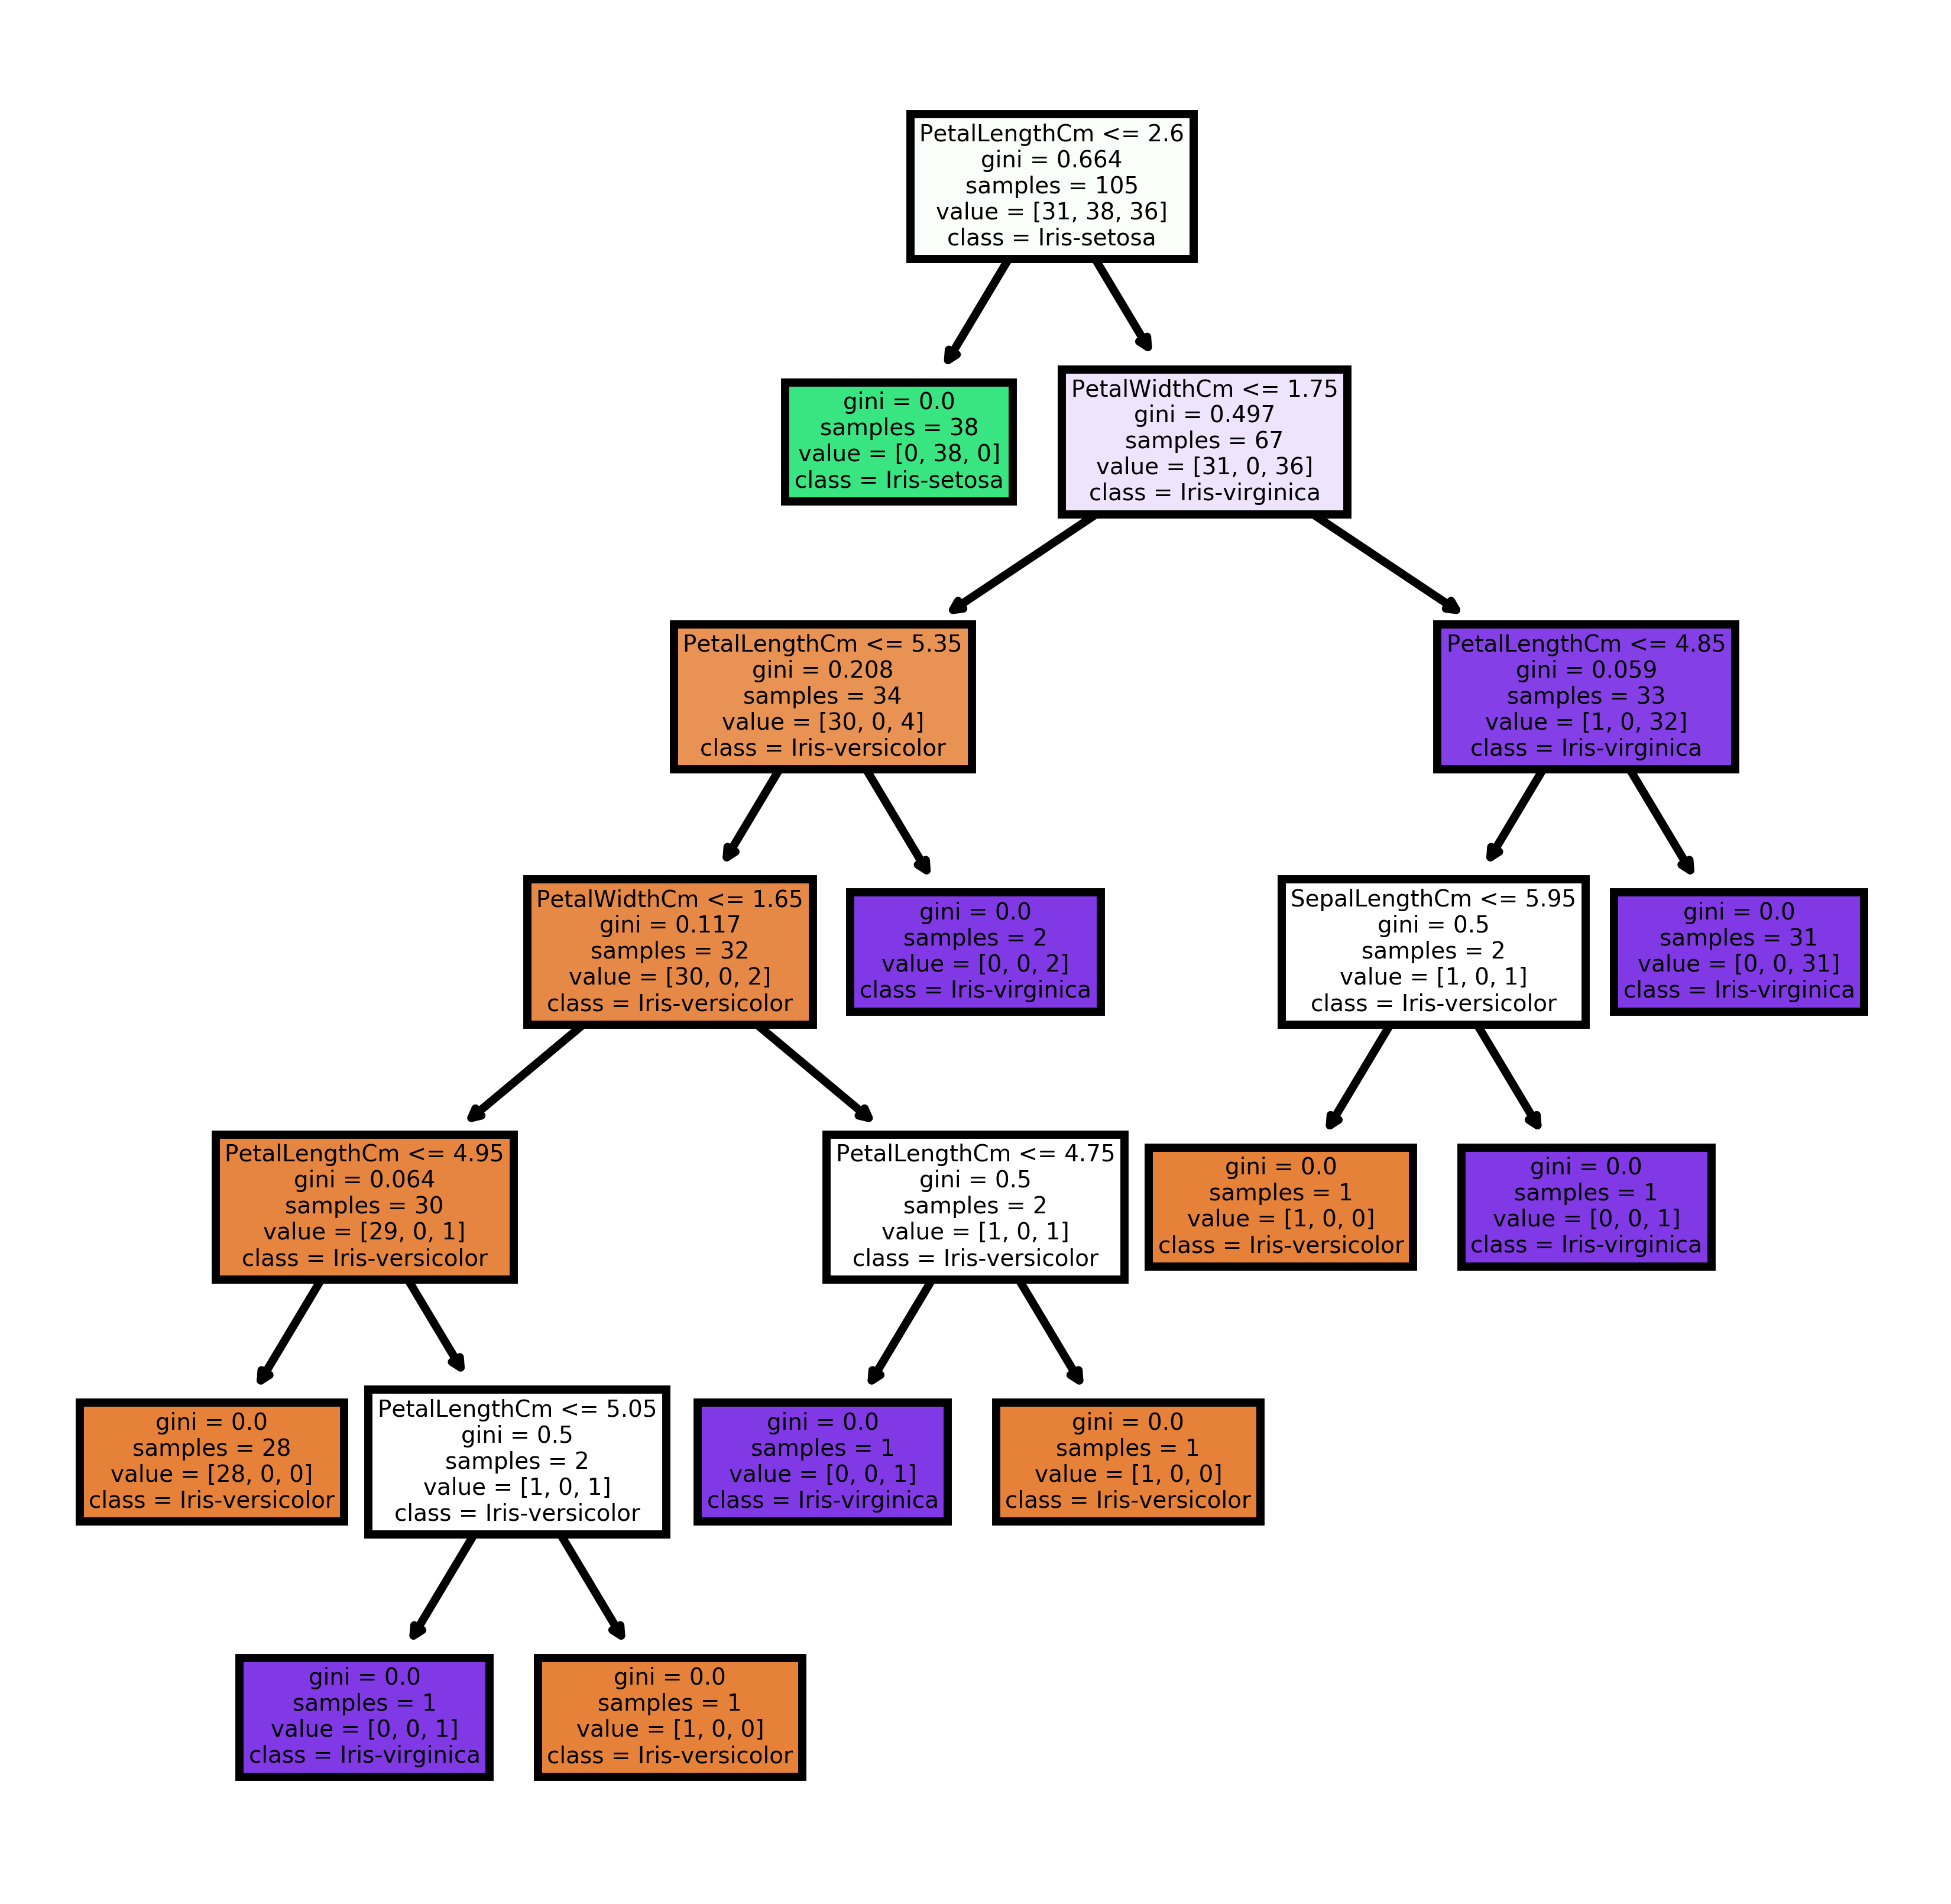

In [16]:
features = df.drop('Species', axis = 1).columns
classes = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 1000)
tree.plot_tree(dtc, feature_names = features, class_names = classes, filled = True)
fig.savefig('Decision Tree.png')